In [30]:
from ipycanvas import Canvas
import numpy as np
import matplotlib.pyplot as plt

In [31]:
puzzle = [
    [1, 2, 3, 4],
    [5, 0, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 6]
]

puzzle = np.array(puzzle)

In [32]:
canvas_width = 400
canvas_height = 400

tile_width = canvas_width / 4
tile_height = canvas_height / 4

canvas = Canvas(width = canvas_width, height = canvas_height, sync_image_data=True)

In [42]:
def draw_puzzle(puzzle):
    canvas.clear()
    for i in range(4):
        for j in range(4):
            canvas.stroke_rect(j * tile_width, i * tile_height, tile_width, tile_height)
            
            if puzzle[i, j] != 0:
                canvas.stroke_text(str(puzzle[i, j]), int((j + 0.5) * tile_width), int((i + 0.5) * tile_height))

def draw_arrow(from_tile, to_tile):
    
    from_x = int((from_tile[0] + 0.5) * tile_width)
    from_y = int((from_tile[1] + 0.5) * tile_height)
    
    to_x = int((to_tile[0] + 0.5) * tile_width)
    to_y = int((to_tile[1] + 0.5) * tile_height)
    
    dist = to_tile - from_tile
    
    dist_offset = 20
    to_x -= int(dist_offset * dist[0])
    to_y -= int(dist_offset * dist[1])
    
    canvas.stroke_style = "red"
    canvas.line_width = 2.0
    canvas.stroke_line(from_x, from_y, to_x, to_y)
    
    # draw tip of arrow
    angle = np.radians(90.0)
    tip_length = 10
    offset = np.sin(angle) * tip_length
    
    # up
    if (dist == np.array([0, -1])).all():
        canvas.stroke_line(to_x, to_y, to_x - offset, to_y + tip_length)
        canvas.stroke_line(to_x, to_y, to_x + offset, to_y + tip_length)
    
    # down
    elif (dist == np.array([0, +1])).all():
        canvas.stroke_line(to_x, to_y, to_x - offset, to_y - tip_length)
        canvas.stroke_line(to_x, to_y, to_x + offset, to_y - tip_length)
        
    # left
    elif (dist == np.array([-1, 0])).all():
        canvas.stroke_line(to_x, to_y, to_x + tip_length, to_y - offset)
        canvas.stroke_line(to_x, to_y, to_x + tip_length, to_y + offset)
        
    elif (dist == np.array([+1, 0])).all():
        canvas.stroke_line(to_x, to_y, to_x - tip_length, to_y - offset)
        canvas.stroke_line(to_x, to_y, to_x - tip_length, to_y + offset)
    
    canvas.stroke_style = "black"
    canvas.line_width = 1.0
    
def draw_puzzle_move(puzzle, move):
        draw_puzzle(puzzle)
        
        empty_pos = np.argwhere(puzzle == 0)[0]
        
        if move == "up":
            draw_arrow(empty_pos, (empty_pos[0], empty_pos[1] - 1))
            
        elif move == "down":
            draw_arrow(empty_pos, (empty_pos[0], empty_pos[1] + 1))
            
        elif move == "left":
            draw_arrow(empty_pos, (empty_pos[0] - 1, empty_pos[1]))
            
        elif move == "right":
            draw_arrow(empty_pos, (empty_pos[0] + 1, empty_pos[1]))

draw_puzzle_move(puzzle, "right")

In [43]:
def show_canvas(canvas_title):
    # save drawing as numpy array and draw with matplotlib
    canvas_img = canvas.get_image_data()

    plt.title(canvas_title)
    plt.imshow(canvas_img)
    plt.axis("off")
    plt.show()

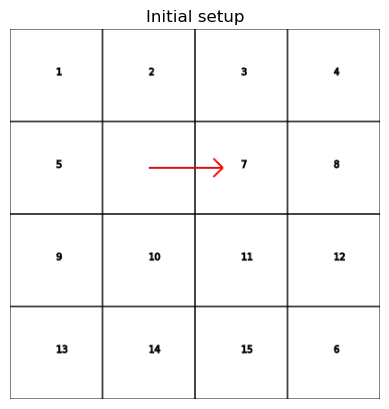

In [44]:
show_canvas("Initial setup")

In [45]:
draw_puzzle_move(puzzle, "left")

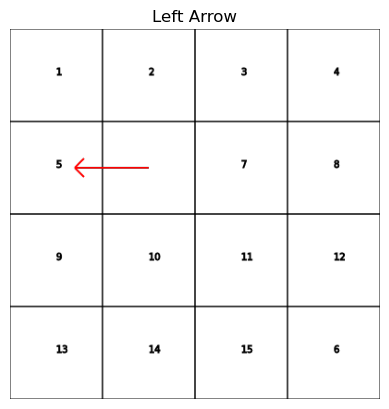

In [46]:
show_canvas("Left Arrow")